<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/EjercicioTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

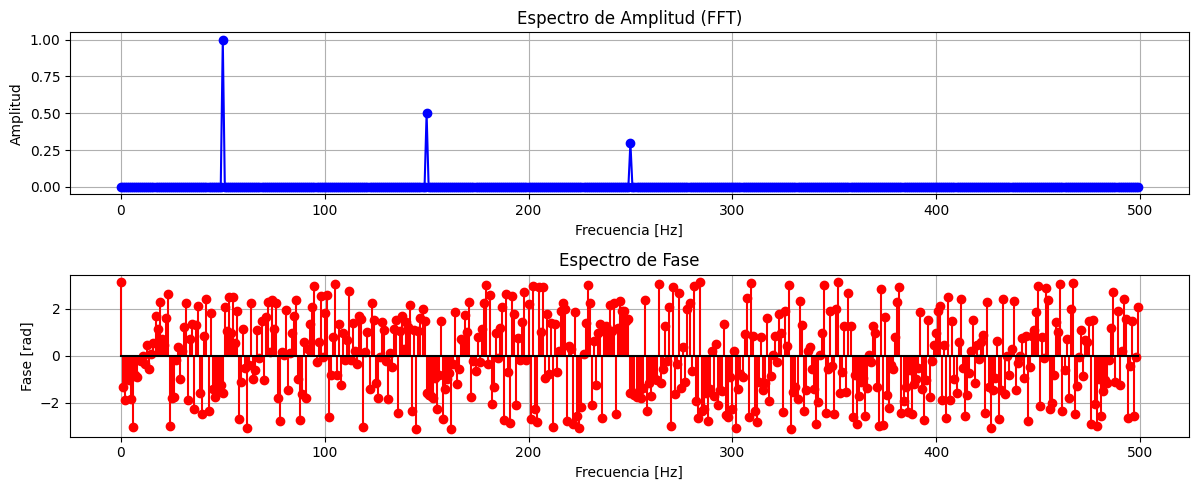

Armónicos detectados (frecuencia, amplitud):
50.0 Hz  ->  1.000
150.0 Hz  ->  0.500
250.0 Hz  ->  0.300


In [1]:
#Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

#Importar librerías
import numpy as np
import matplotlib.pyplot as plt

# === CÁLCULO DE ARMÓNICOS CON FFT ===
# Parámetros de la señal
fs = 1000       # Frecuencia de muestreo [Hz]
T = 1           # Duración de la señal [s]
t = np.linspace(0, T, fs*T, endpoint=False)

# Señal con armónicos (fundamental + 3er + 5to)
f1 = 50   # frecuencia fundamental [Hz]
x = (1*np.sin(2*np.pi*f1*t) +
     0.5*np.sin(2*np.pi*3*f1*t) +
     0.3*np.sin(2*np.pi*5*f1*t))

#FFT
N = len(x)
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, 1/fs)

# Magnitud y fase
magnitude = np.abs(X)/N * 2   # factor 2 para amplitud real
phase = np.angle(X)

# Solo la mitad positiva (frecuencias reales)
half = N//2
freqs = freqs[:half]
magnitude = magnitude[:half]
phase = phase[:half]

# === Graficar resultados ===
plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.plot(freqs, magnitude, 'o-', color='blue')
plt.title('Espectro de Amplitud (FFT)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2,1,2)
plt.stem(freqs, phase, linefmt='r-', markerfmt='ro', basefmt='k')
plt.title('Espectro de Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.grid(True)

plt.tight_layout()
plt.show()

# === Identificar los armónicos principales ===
harmonics = [(f, a) for f, a in zip(freqs, magnitude) if a > 0.1]
print("Armónicos detectados (frecuencia, amplitud):")
for f, a in harmonics:
    print(f"{f:.1f} Hz  ->  {a:.3f}")
